<b><font size = 3 color = green> <center>TULASI RAMARAO IS620 ( Web Analytics) </font> </center> </b><br><br>
<b>Week 6 Project: <br>
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?
You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Sunday October 11th.  You should make a presentation that includes your analysis and any relevant visualizations in our meetup on Thursday October 15th.

Data set downloaded from: https://snap.stanford.edu/data/roadNet-PA.html
This is a road network of Pennsylvania. <br>
Intersections and endpoints are 
represented by nodes, and the roads connecting these intersections or endpoints 
are represented by undirected edges.The ties between these road intersections/endpoints are analyzed. 


In [1]:
# Importing necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# To print inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read the edgelist the downloaded data
G_fb = nx.read_edgelist("roadNet-PA10000.txt", create_using = nx.Graph(), nodetype = int)

# G_fb.nodes()
# G_fb.edges(data = True)
colone = []
coltwo = []
# Store the values in two columns 
for e in G_fb.edges():
    colone.append(e[0])
    coltwo.append(e[1])
       

In [4]:
# Overview of the Network
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 4089
Number of edges: 5453
Average degree:   2.6672


In [5]:
# Create a network layout ( for visualization)
spring_pos = nx.spring_layout(G_fb)

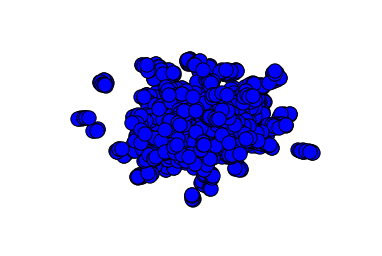

In [6]:
plt.axis("off") # to make it look pretty
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 205,node_color='b')

Borrowed these 3 methods and community.py from https://github.com/socialsensor/community-evolution-analysis

In [7]:
from multiprocessing import Pool
import itertools

In [8]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [9]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [10]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [11]:
#Between centrality -size of nodes show the values for between centrality
#bt = between_parallel(G_fb)
#top = 10

#max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
#bt_values = [5]*len(G_fb.nodes())
#bt_colors = [0]*len(G_fb.nodes())
#for max_key, max_val in max_nodes:
#    bt_values[max_key] = 10
#    bt_colors[max_key] = 2
   
 
 # plt.axis("off")
#nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

Analyze the community using community.py

In [12]:
# Community.py downloaded from 
# https://github.com/socialsensor/community-evolution-analysis/blob/master/python/community.py
import community

In [13]:
# partitions the community on similarities
parts = community.best_partition(G_fb)

values = [parts.get(node) for node in G_fb.nodes()]

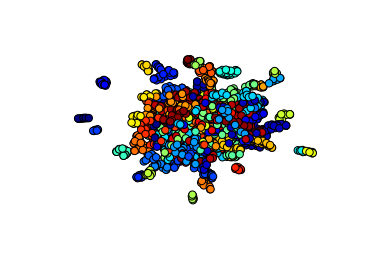

In [14]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size =55, with_labels = False)

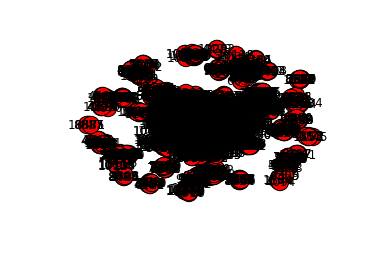

In [15]:
# now project the graph using the bipartite network analysis

from networkx.algorithms import bipartite as bi
clubnet=bi.weighted_projected_graph(G_fb,colone,ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in clubnet.edges(data=True)]
#print("hello",weights)
plt.axis("off")
nx.draw_networkx(clubnet,width=weights,edge_color='b',with_labels=True)
nx.write_graphml(G_fb, "g1Rd.graphml")

(array([  9.49500000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          9.13000000e+02,   0.00000000e+00,   0.00000000e+00,
          6.00000000e+00]),
 array([ 0.        ,  0.10986123,  0.21972246,  0.32958369,  0.43944492,
         0.54930614,  0.65916737,  0.7690286 ,  0.87888983,  0.98875106,
         1.09861229]),
 <a list of 10 Patch objects>)

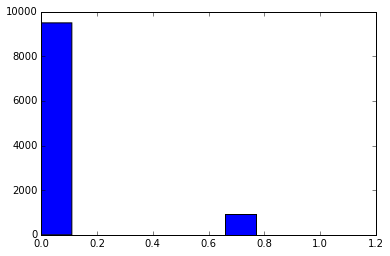

In [16]:
# Trim edges from the text book SNA
def trim_edges(g,weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight: 
            g2.add_edge(f,to,edata)
    return g2
plt.hist(weights)   

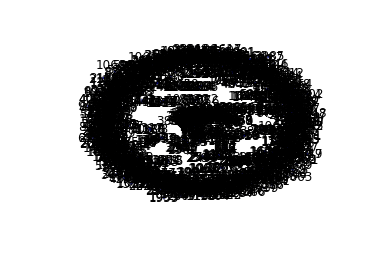

In [17]:

#print(weights)
clubnet_trim=trim_edges(clubnet,weight=math.exp(0.6))

#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in clubnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
#net.draw_networkx(clubnet_trim,width=weights,edge_color=weights)
pos=nx.spring_layout(clubnet_trim)
plt.axis("off")
nx.draw_networkx(clubnet_trim,pos = pos,edge_color='g',node_color='b',width=1,alpha=0.5,
                  node_size =5,labels=None)
nx.write_graphml(clubnet_trim, "g2Rd.graphml")


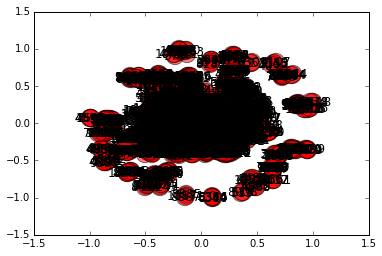

In [18]:
#print(weights)
#Compute an affiliation network of the PACs
pacnet = bi.weighted_projected_graph(G_fb,coltwo,ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]
# Finally draw the graph
nx.draw_networkx(pacnet,width=weights,edge_color='b',alpha=0.5,labels=None)
nx.write_graphml(clubnet_trim, "g3Rd.graphml")


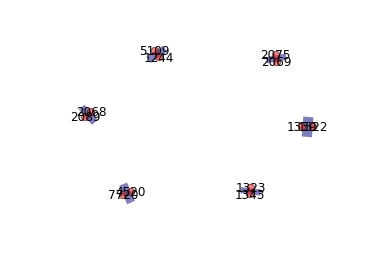

In [19]:
pacnet_trim=trim_edges(pacnet,weight=math.exp(0.75))

#print(weight)
#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in pacnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
pos=nx.spring_layout(pacnet_trim)
plt.axis("off")
nx.draw_networkx(pacnet_trim,pos= pos, edge_color=weights,width=20,
                 alpha=0.5,node_size =55,labels=None)
nx.write_graphml(clubnet_trim, "g4Rd.graphml")

Inference It can be inferred that the interaction among endpoints/intersections of this social network is in distinct clusters is likely to occur in the near future. That is, it predicts the absence/presence of edges between two entities that are diverse in character(heterogeneous). So, there is heavy emphasis on the links than the nodes. From page 96 of the text book, we understand the concept of the duality of persons and groups. People’s ideas, attitudes and social connections are shaped by membership in groups and groups in turn are shaped by its members’ attitudes. So it’s inferred that the intersections and endpoints will tend to have similarities in location and connections. The weight of the inferred links between endpoints/insections are emphasized when relationships are continually accumulated( page 97). The 2-mode network analysis is based on the inference of an idea of homiphily ( page 98) that sharing interests or attributes form ties between things which are very different. Loading Gephi produced the images below and the 

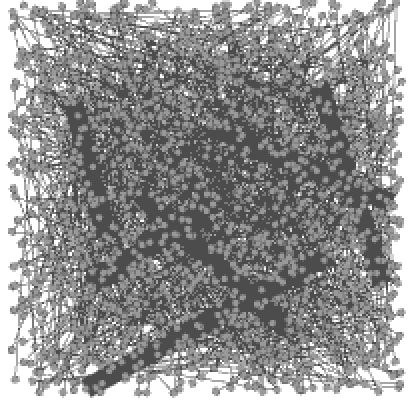

In [20]:
# For road network
from IPython.display import Image
Image(filename='gephiImageG2.png')


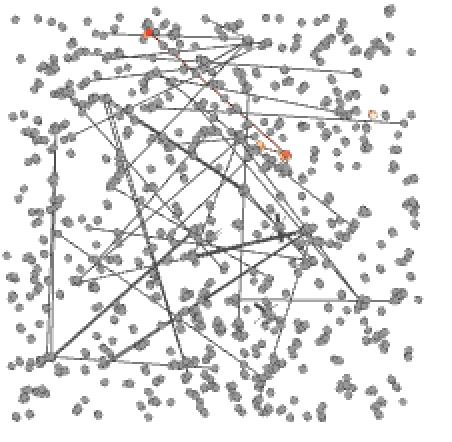

In [21]:
# For road network
from IPython.display import Image
Image(filename='GephiG4.png')